In [6]:
import os 
import pytorch_lightning as pl
import seml
import numpy as np
import torch

from sacred import SETTINGS, Experiment
from functools import partial

import scanpy as sc
import scvelo as scv
import cellrank as cr
import pandas as pd

from scCFM.datamodules.sc_datamodule import scDataModule
from scCFM.models.base.vae import VAE
from scvi.distributions import NegativeBinomial

from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import WandbLogger

from torch.optim import AdamW

import yaml

import sys 
sys.path.insert(0, "../../../" )
from paths import EXPERIMENT_FOLDER

In [ ]:
with open("/nfs/homedirs/pala/scCFM/configs/ae/eb/config.yaml", "r") as stream:
    hparams = yaml.safe_load(stream)["fixed"]

In [12]:
task_name = hparams["training.training"]["task_name"]
        
# Fix seed for reproducibility
torch.manual_seed(hparams["training.training"]["seed"])      
if hparams["training.training"]["seed"]: 
    pl.seed_everything(hparams["training.training"]["seed"], workers=True)

# Initialize folder 
current_experiment_dir = EXPERIMENT_FOLDER / "ae" / task_name
current_experiment_dir.mkdir(parents=True, exist_ok=True) 
    

# Initialize datamodule
datamodule = scDataModule(**hparams["datamodule.datamodule"])



# Initialize the model 
model = VAE(in_dim = datamodule.dim,
            **hparams["model.model"]
            ) 
        

# Initialize callbacks 
model_ckpt_callbacks = ModelCheckpoint(dirpath=current_experiment_dir / "checkpoints", 
                                        **hparams["model_checkpoint.model_checkpoint"])


# Initialize callbacks 
early_stopping_callbacks = EarlyStopping(**hparams["early_stopping.early_stopping"])
        

# Initialize logger 
logger = WandbLogger(save_dir=current_experiment_dir / "logs", 
                     **hparams["logger.logger"]) 
        

# Initialize the lightning trainer 
trainer = Trainer(default_root_dir=current_experiment_dir,
                  callbacks=[model_ckpt_callbacks, early_stopping_callbacks], 
                  logger=logger, 
                  **hparams["trainer.trainer"])
        

# # Fit the model 
trainer.fit(model=model, 
                  train_dataloaders=datamodule.train_dataloader(),
                  val_dataloaders=datamodule.val_dataloader())
train_metrics = trainer.callback_metrics

[rank: 0] Global seed set to 42
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/pytorch_lightning/loggers/wandb.py:396: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-pa ...
  rank_zero_warn(
GPU available: True (cuda), used: Tru

Sanity Checking: 0it [00:00, ?it/s]

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:480: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 wh

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


**Latent space structure**

In [14]:
cells = []
annot = []
with torch.no_grad():
    for batch in datamodule.train_dataloader():
        annot.append(batch["cond"])
        mu = model.encode(batch["X"])[0]
        cells.append(mu)

In [15]:
cells= torch.cat(cells, dim=0)
annot = pd.DataFrame(torch.cat(annot).numpy())
annot.columns = ["experimental_time"]

In [16]:
adata = sc.AnnData(X=cells.cpu().numpy(), 
                  obs=annot)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [17]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

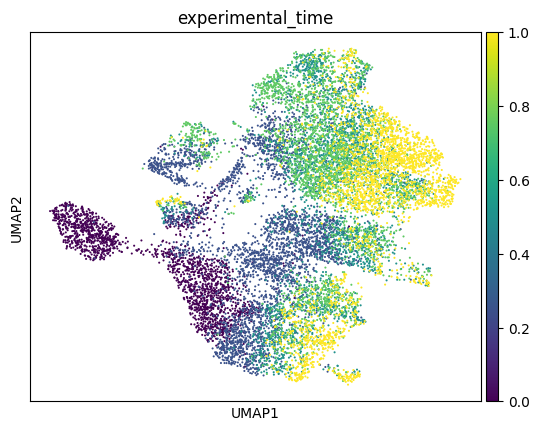

In [18]:
sc.pl.umap(adata, color="experimental_time")

**Generative model from amoritzed**

In [68]:
real_data = [] 
generated_amortized_data = []
generated_data = []
annot = []

with torch.no_grad():
    for batch in datamodule.train_dataloader():
        real_data.append(batch["X"].numpy())
        annot.append(batch["cond"])
        # Amortized
        decoder_output, _, _ = model(batch)
        nb = NegativeBinomial(mu=decoder_output["mu"], theta=torch.exp(model.theta))
        generated_amortized_data.append(nb.sample())
        # Non-amortized 
        z = torch.rand(batch["X"].shape[0], model.latent_dim).to(model.device)
        decoder_output = model.decode(z, library_size=batch["X"].sum(1))
        nb = NegativeBinomial(mu=decoder_output["mu"], theta=torch.exp(model.theta))
        generated_data.append(nb.sample())

In [69]:
real_data = np.concatenate(real_data)
generated_amortized_data = np.concatenate(generated_amortized_data)
generated_data = np.concatenate(generated_data)

Check all together

In [70]:
all_data = np.concatenate([real_data, generated_amortized_data, generated_data], axis=0)
dataset_type = ["real" for _ in range(len(real_data))] + ["generated_amortized" for _ in range(len(generated_amortized_data))] + ["generated" for _ in range(len(generated_data))]
dataset_type_df = pd.DataFrame(dataset_type)
dataset_type_df.columns = ["dataset_type"]
annot = pd.DataFrame(torch.cat(annot).numpy())
annot.columns = ["experimental_time"]

In [71]:
adata = sc.AnnData(X=all_data, 
                  obs=dataset_type_df)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [72]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


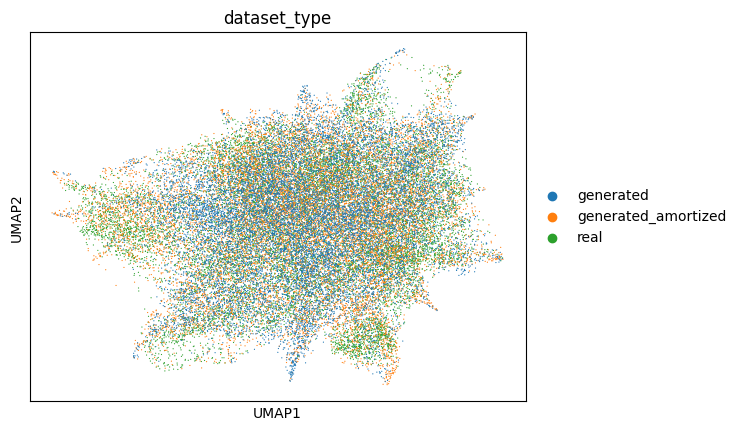

In [73]:
sc.pl.umap(adata, color="dataset_type")

Check alone

In [74]:
adata_amortized = sc.AnnData(X=generated_amortized_data, obs=annot)
adata_generated = sc.AnnData(X=generated_data)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


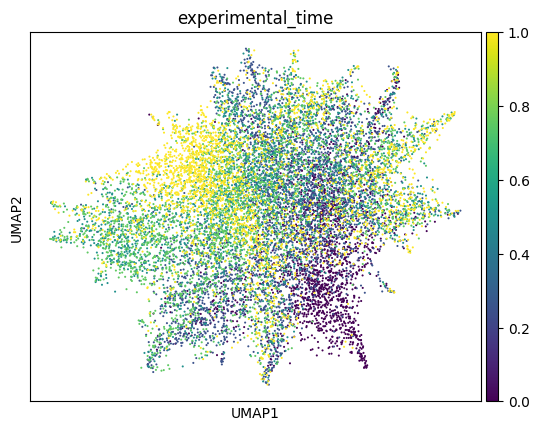

In [75]:
sc.tl.pca(adata_amortized)
sc.pp.neighbors(adata_amortized)
sc.tl.umap(adata_amortized)
sc.pl.umap(adata_amortized, color="experimental_time")

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


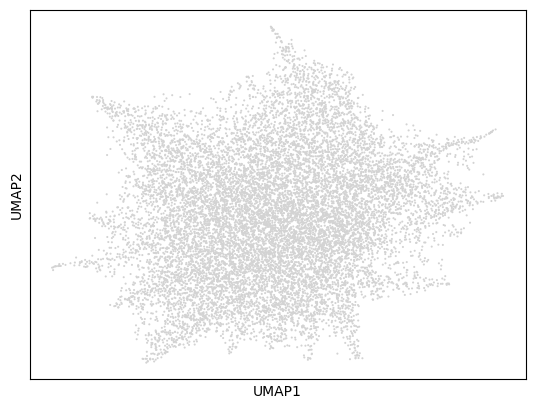

In [76]:
sc.tl.pca(adata_generated)
sc.pp.neighbors(adata_generated)
sc.tl.umap(adata_generated)
sc.pl.umap(adata_generated)

Real

In [77]:
adata_real = sc.AnnData(X=real_data, obs=annot)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


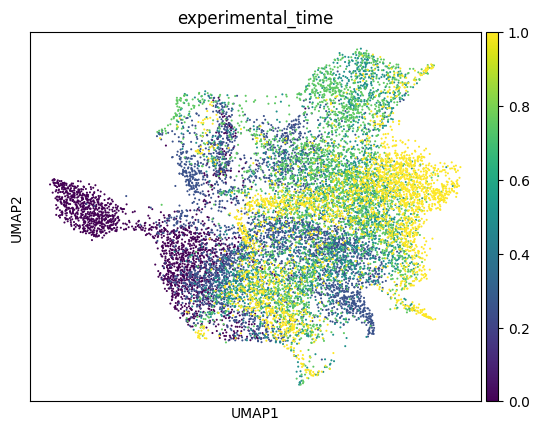

In [78]:
sc.tl.pca(adata_real)
sc.pp.neighbors(adata_real)
sc.tl.umap(adata_real)
sc.pl.umap(adata_real, color="experimental_time")

**Only amortized and real**

In [79]:
amortized_and_real = np.concatenate([real_data, generated_amortized_data], axis=0)
dataset_type = ["real" for _ in range(len(real_data))] + ["generated_amortized" for _ in range(len(generated_amortized_data))] 
dataset_type_df = pd.DataFrame(dataset_type)
dataset_type_df.columns = ["dataset_type"]
annot = pd.concat([annot, annot], axis=0).reset_index(drop=True)
annot.columns = ["experimental_time"]

In [80]:
pd.concat([dataset_type_df, annot], axis=1)

,dataset_type,experimental_time
0,real,0.75
1,real,1.00
2,real,1.00
3,real,0.25
4,real,0.00
...,...,...
26875,generated_amortized,0.75
26876,generated_amortized,1.00
26877,generated_amortized,1.00
26878,generated_amortized,1.00


In [81]:
adata_real_amortized = sc.AnnData(X=amortized_and_real, 
                                      obs=pd.concat([dataset_type_df, annot], axis=1))

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [82]:
sc.tl.pca(adata_real_amortized)
sc.pp.neighbors(adata_real_amortized)
sc.tl.umap(adata_real_amortized)

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


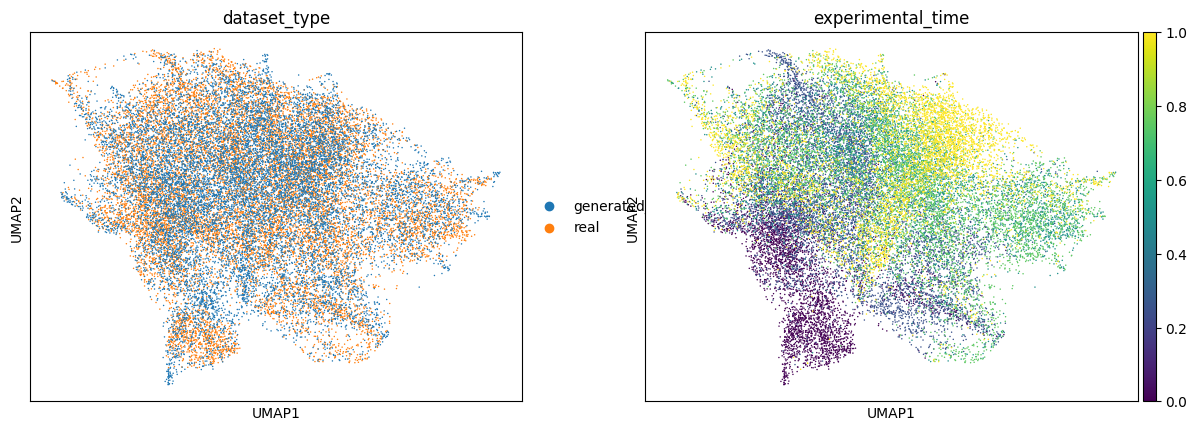

In [83]:
sc.pl.umap(adata_real_amortized, color=["dataset_type", "experimental_time"])

/nfs/staff-ssd/pala/envs/scCFM/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


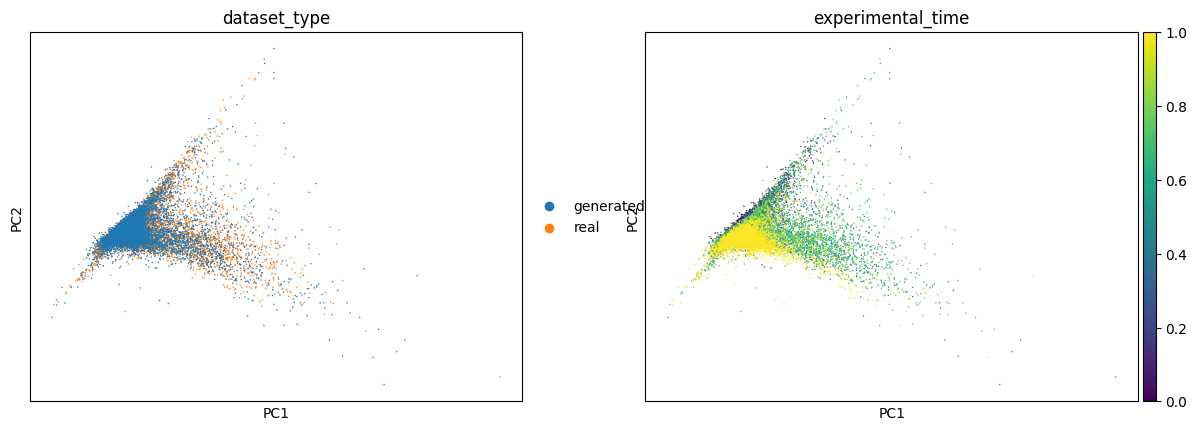

In [85]:
sc.pl.pca(adata_real_amortized, color=["dataset_type", "experimental_time"])